##### Please Ignore the code below, this is inserted to show images
#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
#import all the necessary libraries
import tensorflow as tf
import scipy.io as scp
import numpy as np
import random
from scipy import misc
import matplotlib.pyplot as plt
import datetime

#To plot the graphs in jupyter
%matplotlib inline

In [2]:
def DrawImage(img, title):   
    
        
    fig = plt.figure(figsize=(10,10))
    lossImg = misc.imread(img)
    if(title != None):
        fig.suptitle(title, fontsize=20)
    plt.imshow(lossImg)
    plt.show()

In [3]:
# Load the data 
testData = scp.loadmat('../../data/svhn/test_32x32.mat')
trainData = scp.loadmat('../../data/svhn/train_32x32.mat')

logs_path = '/home/ubuntu/tensorFlowLogs/'

In [4]:
testDataX = testData['X'].astype('float32') / 128.0 - 1         
testDataY = testData['y']

trainDataX = trainData['X'].astype('float32') / 128.0 - 1
trainDataY = trainData['y']

In [5]:
# try tansposing the array
def transposeArray(data):
    xtrain = []
    trainLen = data.shape[3]
    for x in xrange(trainLen):
        xtrain.append(data[:,:,:,x])
    
    xtrain = np.asarray(xtrain)
    return xtrain

In [6]:
trainDataX = transposeArray(trainDataX)
testDataX = transposeArray(testDataX)


In [7]:
def printData(data):
    
    p = np.random.permutation(range(len(data['X'])))
    count = 0
    for i in p:
        num = ((data['y'])[i])[0]
        fig = plt.figure(figsize=(5,5))
        fig.suptitle(num, fontsize=20)
        plt.imshow(trainDataX[i])
        plt.show()
        count = count + 1
        if count > 5:
            break;


In [8]:
def DrawResult(loss, accuracy):
    DrawImage(loss, "Loss")
    DrawImage(accuracy, "Accuracy")

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# CapStone Project

## Machine Learning Engineer Nanodegree

#### This project will try to recognize digits from images. House numbers are recognized from street view images.The data set is picked from the site mentioned below. A detailed analysis is provided in the form of Report. 

Data set 
http://ufldl.stanford.edu/housenumbers/

## 1. Definition

### Project Overview

In this world, it is very important for a computer to understand images. I mean, if a computer is able to make out a person from an image or easily learn how to do edge detection in order to find out objects, it will help solve a lot of real world issues as will automate a lot of things which are now manual for instance

1) Recognizing a dress from an image will help in recommending other dresses 

2) A self driving car to understand images and objects from images 

3) Understanding numbers or text from images will help people to understand languages which they do not understand

and there are numberous domain in which object recognition can be applied. 

In this project, I will train a computer to understand house numbers (0-9) from images. 

#### Project Origin

I took the dataset from the stanford site. There are a whole lot of house number images there. Seperate datasets are provided for training and test data. I will use that for training and testing my nueral network

#### DataSets

One can find the dataset here : http://ufldl.stanford.edu/housenumbers/

Training set : http://ufldl.stanford.edu/housenumbers/train_32x32.mat

Test set : http://ufldl.stanford.edu/housenumbers/test_32x32.mat

Mat files are serialized files of images which can be loaded pretty quickly in python using scypy package.
These images are 32x32x3 images 
Loading the .mat files creates 2 variables: X which is a 4-D matrix containing the images, and y which is a vector of class labels. To access the images, X(:,:,:,i) gives the i-th 32-by-32 RGB image, with class label y(i)


### Problem Statement

I have 2 sets, one is the training set and the other is the test set of images. 
These have low resolution image files which have photos of house numbers in them. The numbers are in the range from 0-9. I will create a neural network which will identify these numbers from photos. 

**Neural Network** : Just like the neural network of the brain, we create a netowrk of neurons(gates) in computers. Inputs (i.e in our case images) are passed [since computers have no ability to see images visually, we first convert them to numbers] and the input or pixels go through these neurons to get converted into another form and finally the activation layer which provides the output. Below you will find an image how this whole thing works in computers


#### Task

Here are a set of task I will perform on the set of data

1) Read the image file(.mat) file in memory [ both training and test set]

2) This will give me a dictionary of 2 variables, a 4D matrix of image and the other the class label

3) Extract the image and the class label in seperate variables

4) The image is a hXwXcxt [height, width, channel, total images].

5) I will transpose or reshape the image for simplifying calculation to a tXhXwXc [total images, height, width, channel

6) The class label will be from 0-9. It is seen that models do not give better results if numbers are used as it is very difficult for a computer to differentiate if use numbers. This is when one hot encoding comes into play.  

7) Create a neural network [options, fullyconnected, convolutional ]

8) Train it with train data

9) Find accuracy with the test data

10) Optimize the model to improve accuracy of the model with repeated training and tests.


### Metrics

Since this is a multi classification problem, some of the metrics options I have are

1) Accuracy

2) confusion matrix

3) log-loss

4) AUC


#### Accuracy

Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions (the number of test data points). 

#### Confusion Metrics

Accuracy does not make distinction between classes.Correct answers for class 1 or other classes are treated equally. To get a more detailed breakdown of a correct and incorrect classification of a particular class we use confusion metrics. Precision and Recall are part of this

#### Log loss

Its the logorithmic loss. It gets into the finer detials of the classifier. If the raw output of the classifier is a numeric probability instead of a class label of 0 or 1, then log-loss can be used. By minimising this, we tend to increase the accuracy of the classifier. 

#### AUC 

This is defined as Area Under curve. The ROC curve shows the sensitivity of the classifier by plotting the rate of true positives to the rate of false positives

Here I define the characterstics of my data and looking at that will decide the metrics

1) My data are images from numbers 0-9

2) There are 10 classes so its a multi classification problem

3) I need to identify to which class every image belongs, therefore identification will be like 0 as not identified and 1 as identified.

4) As per the problem domain, there is no need to find out the precision for a particular class and classifier needs to find out the accuracy over all classes.

As per the above definitions, since for my current problem set, I will not be not be making any distinction between classes or I need precision of a specific class I will use the **Acuracy** metrics which provides me how my model is performing over entire range of classes.


This is how I will be finding out the accuracy of the model

1) There are 10 output neurons to predict numbers from range 0-9

2) Since the neuron activation function is the softmax function, it will give output from range 0-1

3) All the output neurons with have a number from 0-1

4) The one with the max value, is the neuron that we will choose. Since each neuron represents a number, the number will be derieved from this.

5) Thus success is represented as 1 and failiure as 0 and we average it out to get the accuracy.


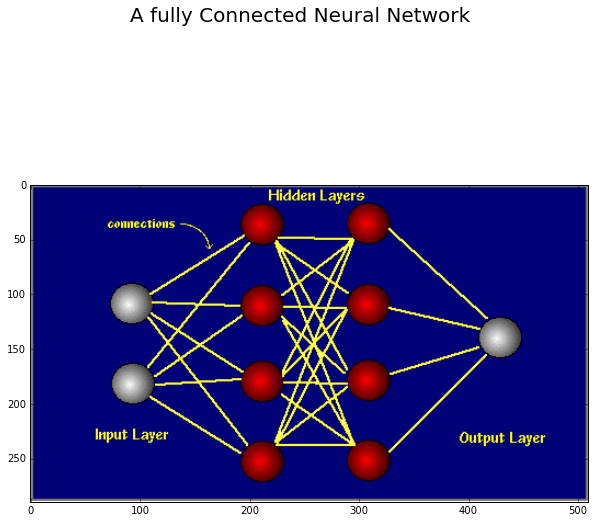

In [9]:
DrawImage('Images/nn_schematic.gif', 'A fully Connected Neural Network')

## II. Analysis 

In this section, I will be doing a complete analysis of the data I have with me. 

### Data Exploration

#### Training and Test Data

Training and test data is provided in the form of mat files which can be easily loaded in the python program. 

One can find the dataset here : http://ufldl.stanford.edu/housenumbers/
Training set : http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Test set : http://ufldl.stanford.edu/housenumbers/test_32x32.mat


**Training Set**
**Image size : 32x32x3
Total Images : 73257**

**Training Set
Image size : 32x32x3
Total Images : 26032**

Below is the total number of Training and test data fro each classes


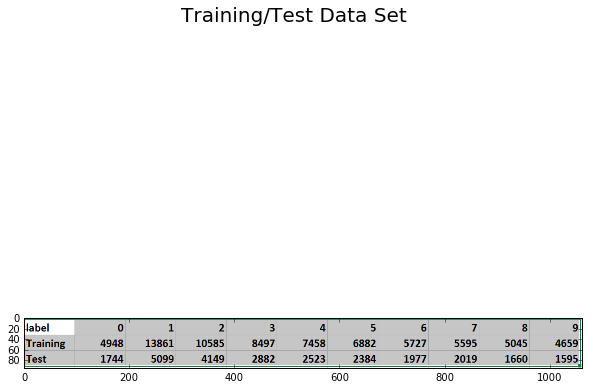

In [10]:
DrawImage('Images/table.PNG', 'Training/Test Data Set')

** As you can see here 1 and 2 classes dataset is more in the training set, which seems to be the same case of the test set **

Since there are 3 channels the matrix values have a range from 0-255. The max value is 255. Initially when I did not normalize my training data, my model did not gave me good accuracy. Also the neural network converge much faster with normalization. To normalize I divided the data with 128 and subtracted it with 1 which will give me data in the range from (-1,-1)..

I do this for both, training and test data

#### Exploratory Visualization

##### Randomly Chosing and showing images

Below are some of the randomly chosen images from the training and the test set. These are low resolution images and its difficult to tell the numbers looking at the images. 

Few points I would like to highlight in the images and the image data

1) There are 3 channels in the images RGB

2) Image pixels are in the range from 0-255

3) A edge detection algorithm or classifier is required as images are blurry and difficult to read 

## Training Images

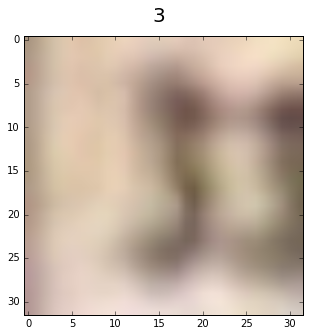

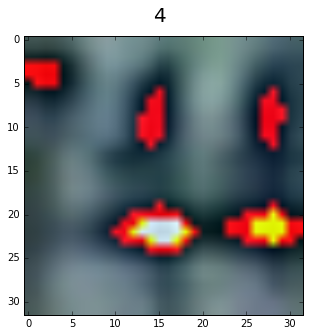

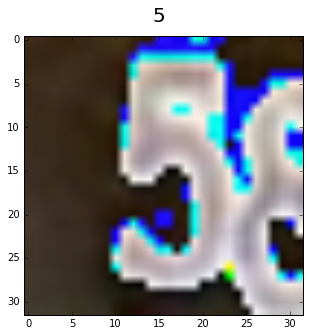

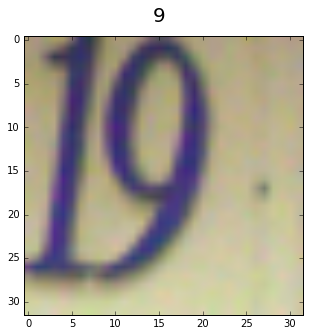

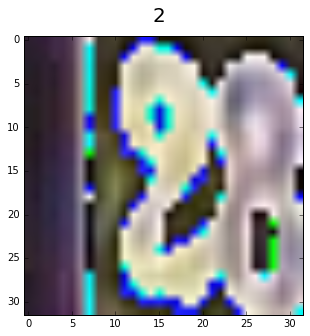

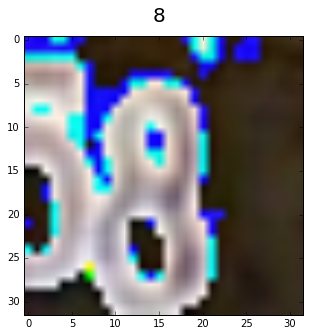

In [11]:
printData(trainData)

## Test Images

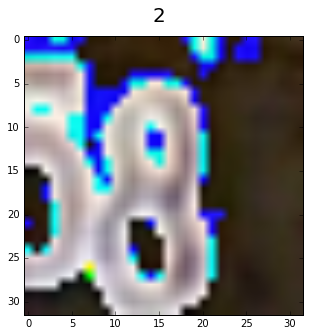

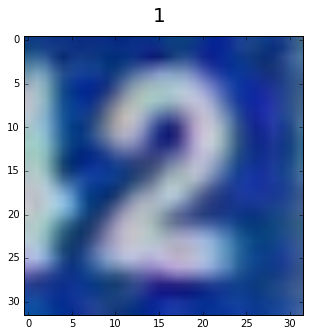

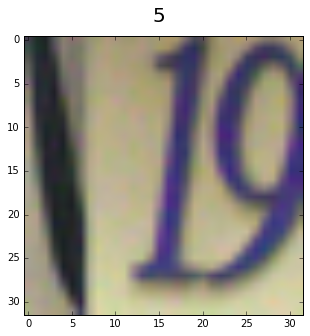

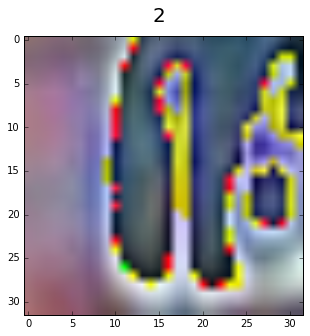

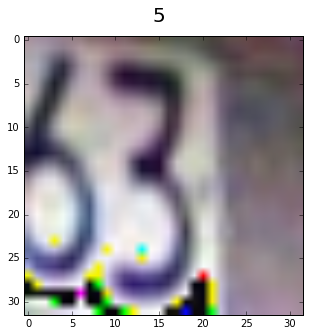

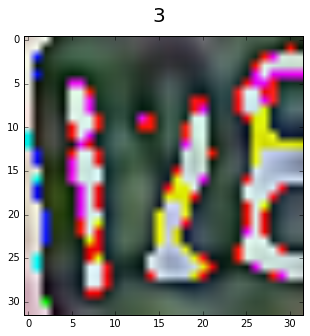

In [12]:
printData(testData)

#### Algorithms and Techniques

For the images above, I need a good edge detection algorithm or a classifier. For this few classifiers that comes to my mind is

1) SVM

2) Neural Netowrk (fully connected)

3) Neural Netowrk (Convolutional Network)

I will be discussing 2 and 3 models in more details which I have used 

** Fully Connected Deep Neural Network **
Initially I used the FNN, giving me a accuracy of arround **40%** taking huge time to learn. So why does a fully connected network gave such a bad accuracy. 

** Image pixels are co-related and for a fully connected NN, single dimension is feeded which does not takes the correlation beteen data into picture. This is why FNN did not gave me a good accuracy.**

My fully connected netork consisted of the following answering some of the questions along

**Few questions**
**How did you split your data to perform training testing and validation**
I already had a training data set and the test data set in the mat file.

**How many layers and nodes did your original DNN have**
Number of hidden layers : **2**
First hidden layers neurons : **32x32x3 = 3072**
Second hidden layer : **1024**

**What kind of optimizer did you use**
I used **GradientDescentOptimizer** 

**Did you do any regularizaion?**
No I did not Regularize it as the accuracy I was getting was pretty bad. The accuracy even on training data was bad so regularization may not have helped as its prevent overfitting.

**What were any other tuning parameters you used**

1) Added 1 more hidden layer (Increases the training time but the accuracy increased marginally)

2) Epoch : Increased the iteration to see it performance improve

3) Tried both Stochoistic and batch gradient descent, not much difference between the two but the later took nearly 3 days for it to trained

4) Increased the batch for stochoistic gradient descent, which did not made much improvement in the accruacy

5) It was giving me **nan** for high learning rate. I had to reduce that.


** Here is the model I have tried to build ( Conv NN ) **
Input Image : 32x32x3

##### Reason why FNN gave a bad accuracy
I found out that for images, there is a strong correlation between pixels in images. Now for a fully connected network, if we convert it to a 1D input, it will somewhat break this correlation. Here is my question on correlation of images on stackoverflow
http://stackoverflow.com/questions/37546491/how-does-a-neural-network-work-with-correlated-image-data?noredirect=1#comment62601217_37546491. 

Reading a lot of articles, I found out that for images, convolution netowrk is most suited. This is because it filters out the image for edge detection at the initial layers before converting it to a 1D array of pixels. 


##### Convolution Neural Network(ConvNet)
This network is inspired by Biological process. This is how the brain neurons works when processing an image. Best suited for image recognition. Here are the tasks that are performed by the ConvNet

** Conv layer : Edge Detection **

** Pooling layer : Down sampling the image to prevent overfitting **

** Default Values for parameters **

Learning Rate  : **1e-1**
Drop put : ** .75 **
epoch : ** 10000 **
Batch Size : ** 16 **


Let me define each layer one by one
first Convolution Hidden layer : 5x5x3x16

##### Edge Detection
Here the kernel size is 5x5. I can either use a 3x3 or a 5x5. 5x5 did a better job. It will filter out the data for edge detection. With 16 kernel size it will give a 16x16x16 output with SAME padding and 1x1 stride. 

Padding : Same, Stride : [1,1,1,1]

###### Also using Relu which will give me output from 0-x where x is the input.

Output of first Convolution Hidden layer : 32x32x16
##### Pooling : It is an important part of Convnet to reduce the spatial size of the representation to reduce the amount of parameters and computation in the network, and hence to also control overfitting.  

Pooling : max, Stride : [2,2] : Output : 16x16x16

##### Second convolution works the same ways as the first one reducing the height and width of the image further. 
Second Convolution Hidden layer : 5x5x16x16

Padding : Same, Stride : [1,1,1,1]

Output of Second Convolution Hidden layer : 16x16x16

Pooling : max, Stride : [2,2] : Output : 8x8x16

##### This is the fully connected layer which will reshape the output of the earlierlayer to 1 dimentional.

third Hidden Layer fully connected : 8x8x16

Output of third Hidden layer : 128

##### This layer will be connected to the output neurons.
Fourth Hidden Layer : 128 x 10

** This is my Convolution Network Diagram **

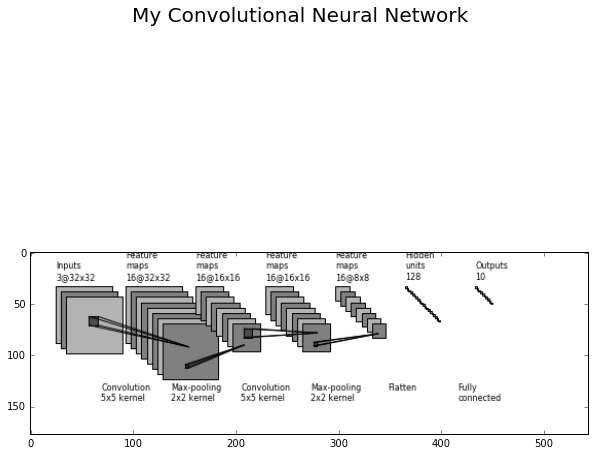

In [13]:
DrawImage('Images/convnet_fig.png', 'My Convolutional Neural Network')

#### BenchMarking

** Fully Connected Neural Network **

Trying this network with the parameters as defined above I got ** ~40% ** accuracy which was pretty bad. I used both the stochoitic gradient decent and batch gradient decent for this but could not imporve upon the accuracy.

I searched on internet but did not find anyone posted any accuracy on the SVHN dataset.

Also, with MNSIT data of images, people got an accuracy of around **~97%**. This is huge. MNIST data images are better than this one. hence I will keep my target accuracy to lesser as

** 80 % : Must to have **
** 85 % : Average **
** 87 % : Nice **
** Above 90% : Love to have **

I have benchmarked the above based on what people have achieved on MNIST data and my own dataset.I will try to have a model for accuracy above 80%

Rejected my earlier fully connected network as it was giving my only 40% accuracy which is way below my minimum targets. 

## III. Methodology

### Data Preprocessing

Here are the preprocessing steps I did on the training and test data

1) Input data is in the form of 32x32x3x73257, I reshaped it to a form 73257x32x32x3. This is for my convinience in accessing the array matrix

2) Got a pretty bad accuracy without doing one hot encoding of the laebls. Did one hot encoding on the labels from 0-9/.  Converting the label to one hot encoding as the prediction really improves. This make sense as well. 

3) Since there are 3 channels the matrix values have a range from 0-255. The max value is 255. Initially when I did not normalize my training data, my model did not gave me good accuracy. Also the neural network converge much faster with normalization. To normalize I divided the data with 128 and subtracted it with 1 which will give me data in the range from (-1,-1).. 

### Implementation

##### Here comes the inputs to the neural network that I have designed. I wll explain the neural network at the later stage where I have defined that in tensorflow. These are the parameters I will be using. I have tried with different options and these are the ones with which I got a good accuracy.

Image height : 32

Width : 32

Channel : 3 (R,G,B)

**tags** : number of output labels : (0-9) = **10**

**patch** : Convolution kernel size, I will use a **5x5** kernel

**Depth** : Total number of kernels I will use in a convolution : **16**

**num_hidden** : These are the number of hidden neurons I will use in the last hidden layer : **128** [ FYI : I have used 64 earlier but with 128 got a better accuracy]

**dropout** : To prevent overfitting, I am using dropout probability: **.75** [ FYI : Used .50 as well, but this gave better accuracy]

**Learning rate **: This is the rate at which the weight parameters learn for the neurons. [ FYI : :Large learning rate was giving me nan, reducing the learning rate helped in converging the model ] : ** 1e-4 **

** Epoch  ** : Epoch is the number of iterations you do for your neural network to learn and optimize. I tried 3 different epochs **10000, 20000 and 50000**. As per my observation and what the theory says with the increase in iterations the model performed better and gave better accuracy. 

** Batch size ** : I used varying batch sizes as well ** 16, 64, 128 **. Increasing batch and iterations gave better results. This wil happen as more images are fed to the system for it to optimize its parameters. 

#### Approach

I shuffled the data to get shuffled indexes of the input data. Then took the first batch of x images and fed to the system. With every iterations next batch is fed. Once all the images are fed and if there are more interations to go, I restart the same process from the beginning. Shuffling the indexes helped as prevents model from overfitting, giving it random images and not in sequence of same class images.

### Refinement

There were several parameters tuning I had to do with a lot of iterations before coming out with the accuracy at which I was satisfied

**Batch Size:**

I am using stochoistic gradient desent. I used batch gradient desent but it was taking days to complete. In batch gradient desent my batch size was the complete input data set. I  had to stop in the middle and use stochoistic which gives nearby performance as that or batch with lesser time. Used diffenent batch size. I used 16,64, 128 batch sizes. I have provided the results for various batch sizes in the result section.

** Learning Rate **

Started with the learnign rate of 1e-1. With high batch size and only in the 2nd or 3rd iteration my model started giving me nan. After a lot of research, I found out that the model with high learning rate may not converge. Reducing to 1e-2 gave nan after few more iterations. After many iterations I used **1e-4** as my learning rate

** Epoch **

I have used various epochs. The results of various epochs have been mentioned in the result sections.

** Drop out **

Dropout prevents overfitting. With dropouts I was getting a better accuracy than without accuracy i.e. a slight increase in the accuracy percentage of 1-2 %. 

** Hidden layers **

More the hidden layers did not helped in the accuracy. There was a small marginal imporvement but took whole lot of time to train. So for me 2 conv, 2 pool and 1 hidden layer worked.

##### Epoch : 10000   Batch : 16
Total Time : 7 min
    
Accuracy on Test set : 82%

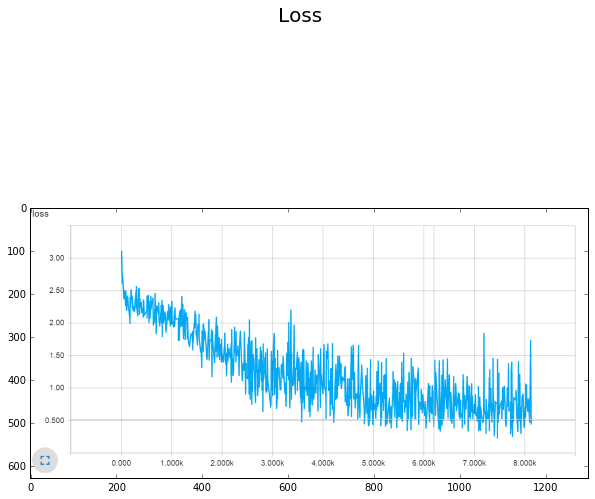

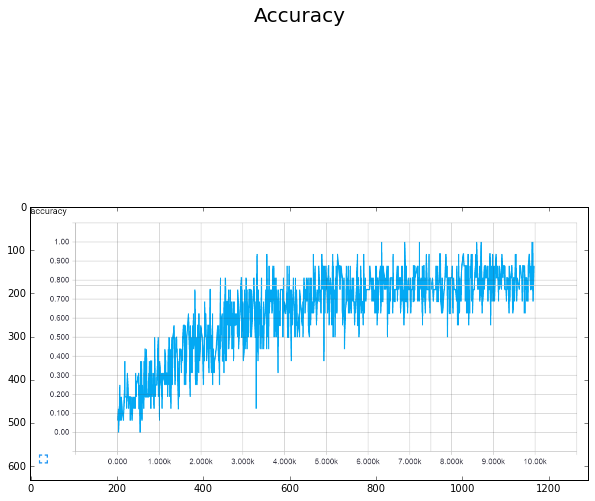

In [14]:
DrawResult('Images/loss1.PNG', 'Images/accuracy1.PNG')

##### Epoch : 20000   Batch : 64

Total Time : 38 min

Accuracy on Test set : 87%

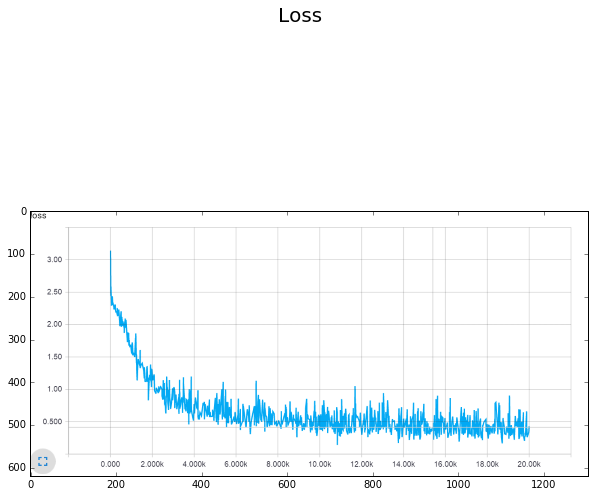

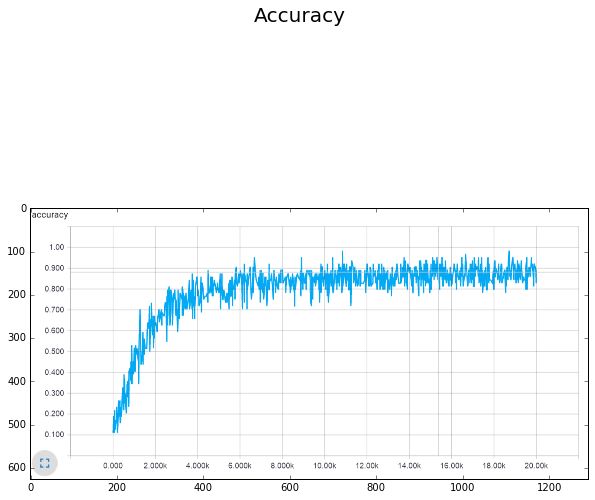

In [15]:
DrawResult('Images/loss2.PNG', 'Images/accuracy2.PNG')

## IV. Results

### Model Evaluation and Validation

Machine used : 8 core 32 gb ram machine

My final model achieves an accuracy of ** ~90 % **

Here are the final parameters I have taken

** Epoch  : 50000 **
** Batch Size : 128 **
** Learning rate : 1e-4 **
** Drop out : .75 **
** Pool : 2x2 , Stride : 2x2 **
** Conv Kernel : 5x5 , Stride : 1x1 **

**Note : This model is also evaluated with the MNIST dataset achieving an accuracy of around ~95% **
** There were small changes in the model for MNIST dataset as it has only 1 channel and image resolution is as low as 28x28. The model was changed to take inputs for these pixels **

** With various epochs and batch size the model provided satisfactorily accuracy as well with the MNIST data set, hence I can validate my model parameters **


##### Epoch : 50000   Batch : 128

Total Time : 120 min

Accuracy on Test set : 90%

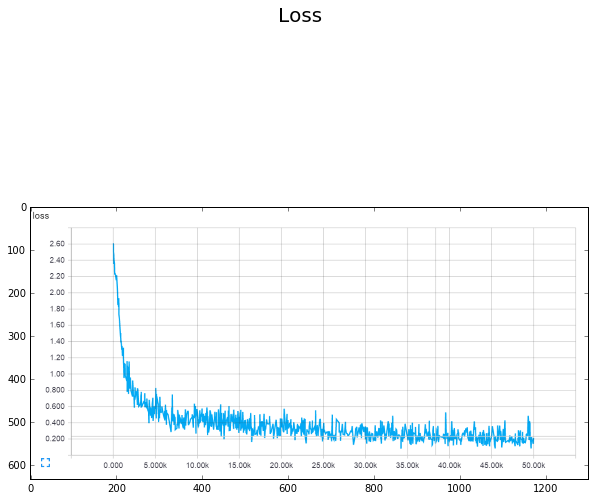

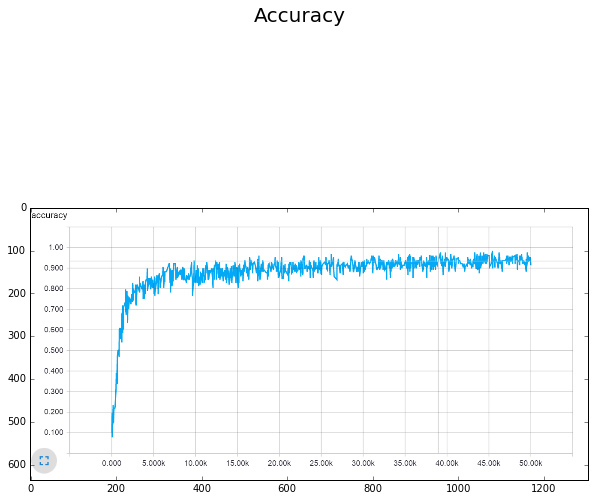

In [16]:
DrawResult('Images/loss3.PNG', 'Images/accuracy3.PNG')

### Justification

Restating my benchmark

** 80 % : Must to have **
** 85 % : Average **
** 87 % : Nice **
** Above 90% : Love to have **

So as per my result, I got ~90% which is up to my expectations. When we talk about accuracy, this model will we right in 9 out of 10 images. I guess this a pretty good result when in terms of image recognition. 

## V. Conclusion

### Free-Form Visualization

I have already provided visualization in the sections. Please have a look at this sections.

### Reflection

I am using stochoistic gradient decent. Since I do not have a GPU, therefore small batch is used to train the model. Batch gradient desent will take days on my machine to learn. 

Even then, Stochoistic gradient decent is giving a very good accuracy. With the increase in batch size, accuracy will also increase, but will not be in that proportion. 

Also I tried increasing the hidden layers, to see if I can get a better accuracy, accuracy increased marginal and took a large time to train. 

Thus the problem of identifying images is solved by my model. Various approaches were used like fully connected neural network, convolutional network, tuning various paramters  as well as using stochoistic and batch gradient decent. 


This is what I conclude and learned from this project

1) Stochoistic gradient decent give comparable accuracy as batch one

2) More the hidden layers, more training time for the model.

3) Convolutions are the models to choose when correlation data is there like images, audio clips etc



#### Improvements

These are my thoughts on improving the model. 

1) Hardware : Looking at the images which are small, it took the model a large with on cpu. So I see DNN takes large times and needs GPU inorder to process. I have not tried with a GPU (costing more) but could get better accuracy with increase in batch, epoch and hidden layers using GPU

2) Parameter tuning : This is an important part of the model training. I saw with Normalization and dropouts I could achive better results. I thinkg if I would have tried out with few more combinations I can achive better like changing the dropout and as stated in above point 1

3) Images with better resolution : Nowdays, there are pretty high resolution images and the model will give a high accuracy with these images. This required even greater momory and processing power which is solved my GPUs. The future of Deep learning is very bright.

### Final Comments


** Reference **

I would like to point out the reference which I have used without which it wouldnt be possible for me to complete the project.

1) Machine learning by Andrew NG on coursera

2) Deep learning course on Udacity

3) Stackoverflow

4) Google.com

5) https://github.com/gwding/draw_convnet/blob/master/README.md : Helped in drawing the conv net


#### My Learning

This project was the best out of all the 5 projects. This is because I learned tensorflow and Conv Net all by myself. I can now understand how things happen. Here are the people or links I would provide which helped me 

#### Future Plans

I have started learning Recurrent NN. Looking at word2vec (CBOW and skip gram). So I targets set for myself

1) Word2Vec (CBOW and skip gram)

1) Recurrent NN

2) NLP  or NLU

3) Start working with syntaxnet or magenta